In [60]:
import pandas as pd
import json
import numpy as np
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import seaborn as sns
import re

import warnings
warnings.filterwarnings('ignore')

# Relações para Plotar 


<ul>
  <li>Países com Mais jogadores de Overall > 90</li>
  <li>Clubes com Mais jogadores de Overall > 90</li>
      <li>Média de Salários Recebidos pelos Jogadores dos 10 primeiros clubes com as maiores médias de idade</li>
      <li>Média de Idade dos jogadores dos maiores clubes da Europa</li>
    <li>Média de Overall por país e por clube</li>
    <li>Média de overall de uma faixa de idade</li>
    <li>Reputação por salário</li>
    <li>Jogadores com a maior margem de crescimento</li>
    <li>Número de jogadores por overall</li>
    <li>Maiores médias de salário por clube</li>
</ul>

In [61]:
def converte_valores_euros(valor):
    valor_string = valor
    valor_convertido = float(re.sub('[a-zA-Z€]*', '', valor_string))
    
    if (valor.find('K') >= 0):
        valor_convertido *= 1000
    elif (valor.find('M') >=0 ):
        valor_convertido *= 1000000
    
    return valor_convertido / 1000000

In [62]:
siglas_posicoes = {
    'GK': "Goleiro",
    'RB': "Lateral Direito",
    'CB': "Zagueiro",
    'LB': "Lateral Esquerdo",
    'SW': "Zagueiro",
    'RWB': "Lateral Direito",
    'LWB': "Lateral Esquerdo",
    'CDM': "Volante",
    'CM' : "Meia",
    'CAM': "Meia-Atacante",
    'OM' : "Meia", 
    'LOM': "Meia-Atacante",
    'ROM': "Meia-Atacente",
    'LM' : "Meia", 
    'RM' : "Meia",
    'LWM': "Meia",
    'RWM': "Meia",
    'RW':"Atacante",
    'LW':"Atacante",
    'LF':"Atacante",
    'RF': "Atacante",
    'ST': "Atacante",
    'CF': "Centro Avante",
    'RS': "Atacante",
    'LS': "Atacante",
    'RCM': "Meia",
    'RCB': "Zagueiro",
    'LCM': "Meia",
    'LDM': "Meia",
    'LCB': "Zagueiro",
    'RDM': "Meia",
    'RAM': "Atacante",
    'LAM': "Atacante"
}




In [63]:
def converte_altura(altura):
    string_quebrada = altura.split("'")
    return round(((float(string_quebrada[0]) * 30.38) + (float(string_quebrada[1]) * 2.54)) / 100, 2)

In [64]:
def converte_peso(peso):
    peso_float = float(re.sub('[a-zA-Z€]*', '', peso))
    return round(peso_float / 2.2046,2)

# Importando o Dataset (FIFA 19 complete player dataset)

In [65]:
df_fifa = pd.read_csv('fifa.csv')

In [66]:
df_fifa.shape

(18207, 89)

In [67]:
df_fifa.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [68]:
df_fifa.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [69]:
df_fifa = df_fifa.drop(['Unnamed: 0', 'ID', 'Photo', 'Flag', 'Club Logo', 'Special', 'GKKicking', 'GKPositioning'], axis='columns')

In [70]:
df_fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,...,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKReflexes,Release Clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,5.0,...,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,8.0,€226.5M
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,5.0,...,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,11.0,€127.1M
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,5.0,...,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,11.0,€228.1M
3,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,4.0,...,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,94.0,€138.6M
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,4.0,...,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,13.0,€196.4M


In [71]:
df_fifa['Value'] = df_fifa['Value'].apply(lambda x: converte_valores_euros(x))

Transformando a coluna Preferred Foot em numérica
----------------------------------------------------------------------------

In [72]:
df_fifa['Preferred Foot'] = df_fifa['Preferred Foot'].replace({'Left': 0, 'Right':1})

In [73]:
df_fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,...,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKReflexes,Release Clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,110.5,€565K,0.0,5.0,...,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,8.0,€226.5M
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77.0,€405K,1.0,5.0,...,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,11.0,€127.1M
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118.5,€290K,1.0,5.0,...,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,11.0,€228.1M
3,De Gea,27,Spain,91,93,Manchester United,72.0,€260K,1.0,4.0,...,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,94.0,€138.6M
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102.0,€355K,1.0,4.0,...,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,13.0,€196.4M


In [74]:
df_fifa['Position']

0         RF
1         ST
2         LW
3         GK
4        RCM
5         LF
6        RCM
7         RS
8        RCB
9         GK
10        ST
11       LCM
12        CB
13       LCM
14       LDM
15        LF
16        ST
17       CAM
18        GK
19        GK
20       CDM
21        LS
22        GK
23        ST
24       LCB
25        RM
26        RM
27       CDM
28       LAM
29        LW
        ... 
18177     ST
18178     GK
18179     CB
18180     GK
18181     RB
18182    CDM
18183     GK
18184     CM
18185    LCM
18186     CM
18187     RB
18188     CM
18189     ST
18190     CM
18191     LB
18192    CDM
18193     RB
18194     GK
18195     CM
18196     CM
18197     CM
18198     GK
18199     CM
18200     ST
18201     RB
18202     CM
18203     ST
18204     ST
18205     RW
18206     CM
Name: Position, Length: 18207, dtype: object

# Clubes com mais jogadores de Overall > 90

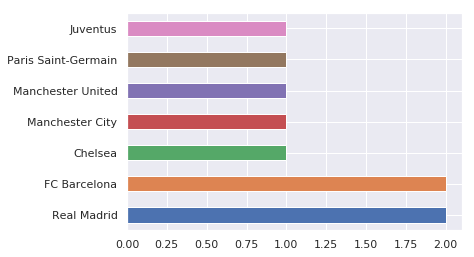

In [75]:
df_fifa['Club'][df_fifa['Overall'] > 90].value_counts().plot(kind='barh')

In [76]:
df_fifa['Overall'].value_counts()

66    1163
67    1118
64    1091
65    1045
68    1035
63    1002
69     973
70     889
62     878
71     783
72     753
61     711
60     649
73     608
74     537
59     525
75     497
58     444
57     402
76     373
56     343
77     304
55     265
54     250
53     199
79     171
78     168
52     159
80     143
51     125
50     103
82      94
81      93
83      70
84      45
49      36
85      33
48      32
86      22
47      20
88      17
87      13
89      11
91       6
90       5
94       2
92       1
46       1
Name: Overall, dtype: int64

In [77]:
df_fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,...,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKReflexes,Release Clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,110.5,€565K,0.0,5.0,...,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,8.0,€226.5M
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77.0,€405K,1.0,5.0,...,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,11.0,€127.1M
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118.5,€290K,1.0,5.0,...,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,11.0,€228.1M
3,De Gea,27,Spain,91,93,Manchester United,72.0,€260K,1.0,4.0,...,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,94.0,€138.6M
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102.0,€355K,1.0,4.0,...,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,13.0,€196.4M


In [78]:
df_fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,...,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKReflexes,Release Clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,110.5,€565K,0.0,5.0,...,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,8.0,€226.5M
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77.0,€405K,1.0,5.0,...,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,11.0,€127.1M
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118.5,€290K,1.0,5.0,...,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,11.0,€228.1M
3,De Gea,27,Spain,91,93,Manchester United,72.0,€260K,1.0,4.0,...,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,94.0,€138.6M
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102.0,€355K,1.0,4.0,...,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,13.0,€196.4M


In [79]:
df_fifa_filtrado = df_fifa[['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value', 'Wage', 'Preferred Foot','International Reputation', 'Position', 'Height', 'Weight', 'Jersey Number', 'Release Clause']]

In [80]:
df_fifa_filtrado.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Position,Height,Weight,Jersey Number,Release Clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,110.5,€565K,0.0,5.0,RF,5'7,159lbs,10.0,€226.5M
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77.0,€405K,1.0,5.0,ST,6'2,183lbs,7.0,€127.1M
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118.5,€290K,1.0,5.0,LW,5'9,150lbs,10.0,€228.1M
3,De Gea,27,Spain,91,93,Manchester United,72.0,€260K,1.0,4.0,GK,6'4,168lbs,1.0,€138.6M
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102.0,€355K,1.0,4.0,RCM,5'11,154lbs,7.0,€196.4M


In [81]:
df_fifa_filtrado = df_fifa_filtrado.dropna()

In [82]:
df_fifa_filtrado['Preferred Foot']

0        0.0
1        1.0
2        1.0
3        1.0
4        1.0
5        1.0
6        1.0
7        1.0
8        1.0
9        1.0
10       1.0
11       1.0
12       1.0
13       0.0
14       1.0
15       0.0
16       1.0
17       0.0
18       1.0
19       0.0
20       1.0
21       1.0
22       1.0
23       1.0
24       0.0
25       1.0
26       0.0
27       1.0
29       1.0
30       1.0
        ... 
18176    1.0
18177    1.0
18178    1.0
18179    1.0
18180    1.0
18181    1.0
18182    1.0
18184    1.0
18185    1.0
18186    1.0
18187    1.0
18188    1.0
18189    1.0
18190    1.0
18191    0.0
18192    1.0
18193    1.0
18194    1.0
18195    1.0
18196    1.0
18197    1.0
18198    1.0
18199    1.0
18200    0.0
18201    0.0
18202    1.0
18203    1.0
18204    1.0
18205    1.0
18206    1.0
Name: Preferred Foot, Length: 16643, dtype: float64

In [83]:
df_fifa_filtrado['Preferred Foot'] = df_fifa_filtrado['Preferred Foot'].apply(lambda x: int(x))

In [84]:
df_fifa_filtrado['Position'].value_counts()

ST     1924
GK     1900
CB     1646
CM     1276
LB     1223
RB     1199
RM     1022
LM     1012
CAM     877
CDM     873
RCB     615
LCB     595
RCM     355
LCM     353
LW      338
RW      325
RDM     228
LDM     224
LS      184
RS      179
RWB      84
LWB      76
CF       66
RAM      21
LAM      20
LF       15
RF       13
Name: Position, dtype: int64

In [85]:
df_fifa_filtrado['Wage'] = df_fifa_filtrado['Wage'].apply(lambda x: converte_valores_euros(x))

In [86]:
df_fifa_filtrado

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Position,Height,Weight,Jersey Number,Release Clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,110.50,0.565,0,5.0,RF,5'7,159lbs,10.0,€226.5M
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77.00,0.405,1,5.0,ST,6'2,183lbs,7.0,€127.1M
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118.50,0.290,1,5.0,LW,5'9,150lbs,10.0,€228.1M
3,De Gea,27,Spain,91,93,Manchester United,72.00,0.260,1,4.0,GK,6'4,168lbs,1.0,€138.6M
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102.00,0.355,1,4.0,RCM,5'11,154lbs,7.0,€196.4M
5,E. Hazard,27,Belgium,91,91,Chelsea,93.00,0.340,1,4.0,LF,5'8,163lbs,10.0,€172.1M
6,L. Modrić,32,Croatia,91,91,Real Madrid,67.00,0.420,1,4.0,RCM,5'8,146lbs,10.0,€137.4M
7,L. Suárez,31,Uruguay,91,91,FC Barcelona,80.00,0.455,1,5.0,RS,6'0,190lbs,9.0,€164M
8,Sergio Ramos,32,Spain,91,91,Real Madrid,51.00,0.380,1,4.0,RCB,6'0,181lbs,15.0,€104.6M
9,J. Oblak,25,Slovenia,90,93,Atlético Madrid,68.00,0.094,1,3.0,GK,6'2,192lbs,1.0,€144.5M


In [87]:
df_fifa_filtrado['Release Clause'] = df_fifa_filtrado['Release Clause'].apply(lambda x: converte_valores_euros(x))
df_fifa_filtrado['Jersey Number'] = df_fifa_filtrado['Jersey Number'].apply(lambda x: int(x))
df_fifa_filtrado['International Reputation'] = df_fifa_filtrado['International Reputation'].apply(lambda x: int(x))
df_fifa_filtrado['Height'] = df_fifa_filtrado['Height'].apply(lambda x: converte_altura(x))
df_fifa_filtrado['Weight'] = df_fifa_filtrado['Weight'].apply(lambda x: converte_peso(x))
df_fifa_filtrado['Position'] = df_fifa_filtrado['Position'].apply(lambda x: siglas_posicoes[x])


df_fifa_filtrado.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Position,Height,Weight,Jersey Number,Release Clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,110.5,0.565,0,5,Atacante,1.70,72.12,10,226.5
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77.0,0.405,1,5,Atacante,1.87,83.01,7,127.1
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118.5,0.290,1,5,Atacante,1.75,68.04,10,228.1
3,De Gea,27,Spain,91,93,Manchester United,72.0,0.260,1,4,Goleiro,1.92,76.20,1,138.6
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102.0,0.355,1,4,Meia,1.80,69.85,7,196.4


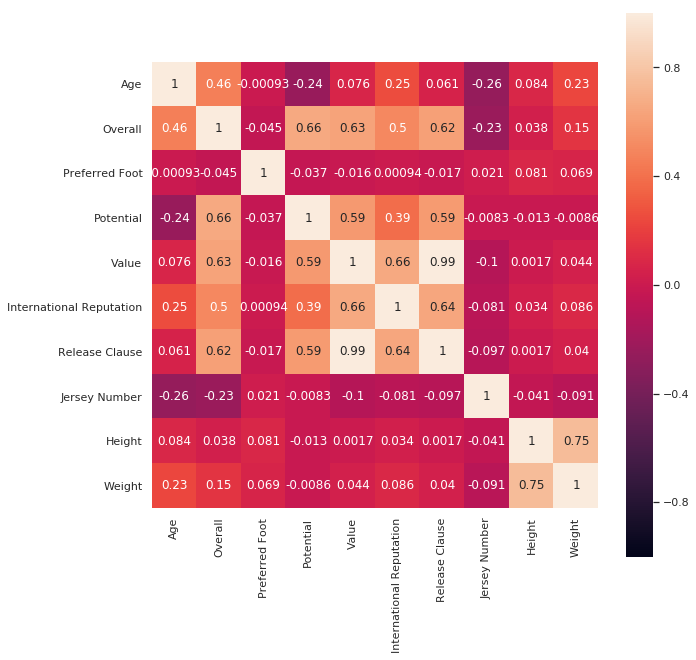

In [88]:
# Matriz de correlação
corr_mat = df_fifa_filtrado[['Age', 'Overall', 'Preferred Foot', 'Potential', 'Value', 'International Reputation', 'Release Clause', 'Jersey Number', 'Height', 'Weight']].corr()



f, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(
    corr_mat, 
    annot=True, 
    square=True, 
    vmax=1, 
    vmin=-1
)

In [89]:
df_fifa_filtrado

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Position,Height,Weight,Jersey Number,Release Clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,110.50,0.565,0,5,Atacante,1.70,72.12,10,226.500
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77.00,0.405,1,5,Atacante,1.87,83.01,7,127.100
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118.50,0.290,1,5,Atacante,1.75,68.04,10,228.100
3,De Gea,27,Spain,91,93,Manchester United,72.00,0.260,1,4,Goleiro,1.92,76.20,1,138.600
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102.00,0.355,1,4,Meia,1.80,69.85,7,196.400
5,E. Hazard,27,Belgium,91,91,Chelsea,93.00,0.340,1,4,Atacante,1.72,73.94,10,172.100
6,L. Modrić,32,Croatia,91,91,Real Madrid,67.00,0.420,1,4,Meia,1.72,66.23,10,137.400
7,L. Suárez,31,Uruguay,91,91,FC Barcelona,80.00,0.455,1,5,Atacante,1.82,86.18,9,164.000
8,Sergio Ramos,32,Spain,91,91,Real Madrid,51.00,0.380,1,4,Zagueiro,1.82,82.10,15,104.600
9,J. Oblak,25,Slovenia,90,93,Atlético Madrid,68.00,0.094,1,3,Goleiro,1.87,87.09,1,144.500


In [90]:
df_fifa_filtrado['Position'].value_counts()

Meia                4470
Atacante            3019
Zagueiro            2856
Goleiro             1900
Lateral Esquerdo    1299
Lateral Direito     1283
Meia-Atacante        877
Volante              873
Centro Avante         66
Name: Position, dtype: int64

In [91]:
df_fifa_filtrado.set_index('Name')

,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Position,Height,Weight,Jersey Number,Release Clause
Name,,,,,,,,,,,,,,
L. Messi,31,Argentina,94,94,FC Barcelona,110.50,0.565,0,5,Atacante,1.70,72.12,10,226.500
Cristiano Ronaldo,33,Portugal,94,94,Juventus,77.00,0.405,1,5,Atacante,1.87,83.01,7,127.100
Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118.50,0.290,1,5,Atacante,1.75,68.04,10,228.100
De Gea,27,Spain,91,93,Manchester United,72.00,0.260,1,4,Goleiro,1.92,76.20,1,138.600
K. De Bruyne,27,Belgium,91,92,Manchester City,102.00,0.355,1,4,Meia,1.80,69.85,7,196.400
E. Hazard,27,Belgium,91,91,Chelsea,93.00,0.340,1,4,Atacante,1.72,73.94,10,172.100
L. Modrić,32,Croatia,91,91,Real Madrid,67.00,0.420,1,4,Meia,1.72,66.23,10,137.400
L. Suárez,31,Uruguay,91,91,FC Barcelona,80.00,0.455,1,5,Atacante,1.82,86.18,9,164.000
Sergio Ramos,32,Spain,91,91,Real Madrid,51.00,0.380,1,4,Zagueiro,1.82,82.10,15,104.600


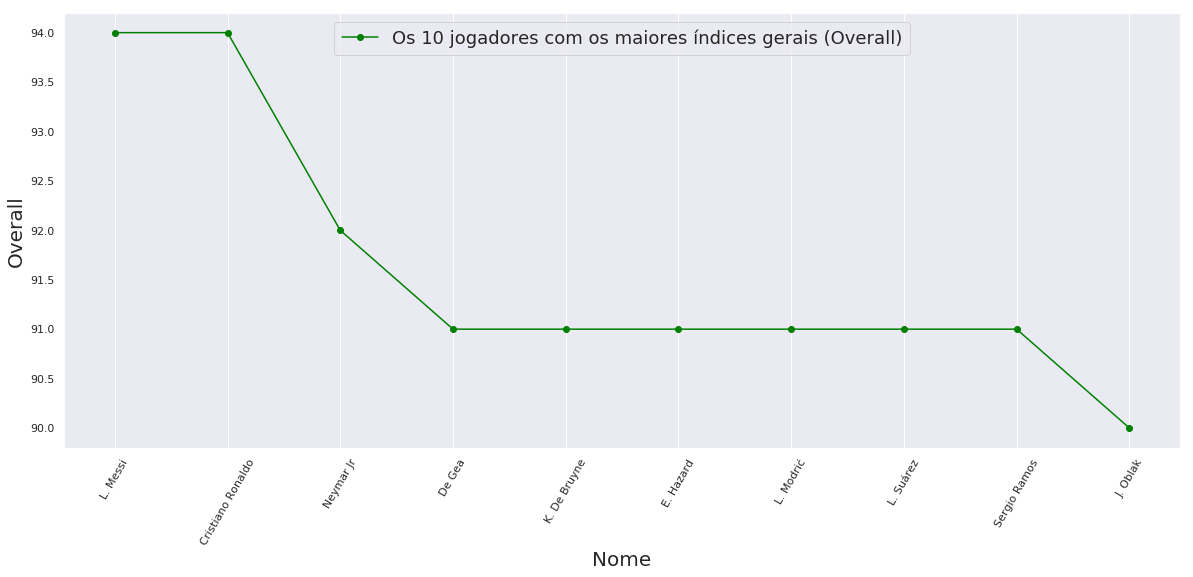

In [92]:
plt.figure(figsize=(20, 8))
plt.plot(df_fifa_filtrado['Name'][:10], df_fifa_filtrado['Overall'][:10], color='green', label='Os 10 jogadores com os maiores índices gerais (Overall)', linestyle='-', marker='o')

plt.legend(loc='upper center', prop={'size':18})
plt.xlabel('Nome', fontdict={'size':20})
plt.ylabel('Overall', fontdict={'size':20})
plt.xticks(rotation='60')
plt.grid(axis='y')

In [93]:
df_fifa_filtrado[['Name', 'Overall']][:10]

,Name,Overall
0,L. Messi,94
1,Cristiano Ronaldo,94
2,Neymar Jr,92
3,De Gea,91
4,K. De Bruyne,91
5,E. Hazard,91
6,L. Modrić,91
7,L. Suárez,91
8,Sergio Ramos,91
9,J. Oblak,90


In [94]:
print("Menor índice geral (Overall): ", df_fifa_filtrado['Overall'].min())
print("Índice geral (Overall) médio: ", round(df_fifa_filtrado['Overall'].mean(),2))
print("Maior índice geral (Overall): ", df_fifa_filtrado['Overall'].max())

Menor índice geral (Overall):  46
Índice geral (Overall) médio:  66.16
Maior índice geral (Overall):  94


In [95]:
df_overall_80 = df_fifa_filtrado[df_fifa_filtrado['Overall'] >= 80]

df_overall_80

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Position,Height,Weight,Jersey Number,Release Clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,110.5,0.565,0,5,Atacante,1.70,72.12,10,226.5
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77.0,0.405,1,5,Atacante,1.87,83.01,7,127.1
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118.5,0.290,1,5,Atacante,1.75,68.04,10,228.1
3,De Gea,27,Spain,91,93,Manchester United,72.0,0.260,1,4,Goleiro,1.92,76.20,1,138.6
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102.0,0.355,1,4,Meia,1.80,69.85,7,196.4
5,E. Hazard,27,Belgium,91,91,Chelsea,93.0,0.340,1,4,Atacante,1.72,73.94,10,172.1
6,L. Modrić,32,Croatia,91,91,Real Madrid,67.0,0.420,1,4,Meia,1.72,66.23,10,137.4
7,L. Suárez,31,Uruguay,91,91,FC Barcelona,80.0,0.455,1,5,Atacante,1.82,86.18,9,164.0
8,Sergio Ramos,32,Spain,91,91,Real Madrid,51.0,0.380,1,4,Zagueiro,1.82,82.10,15,104.6
9,J. Oblak,25,Slovenia,90,93,Atlético Madrid,68.0,0.094,1,3,Goleiro,1.87,87.09,1,144.5


Text(0.5,1,'Relação entre Potencial (Potential) e o valor da Cláusula de Rescisão (Release Clause)')

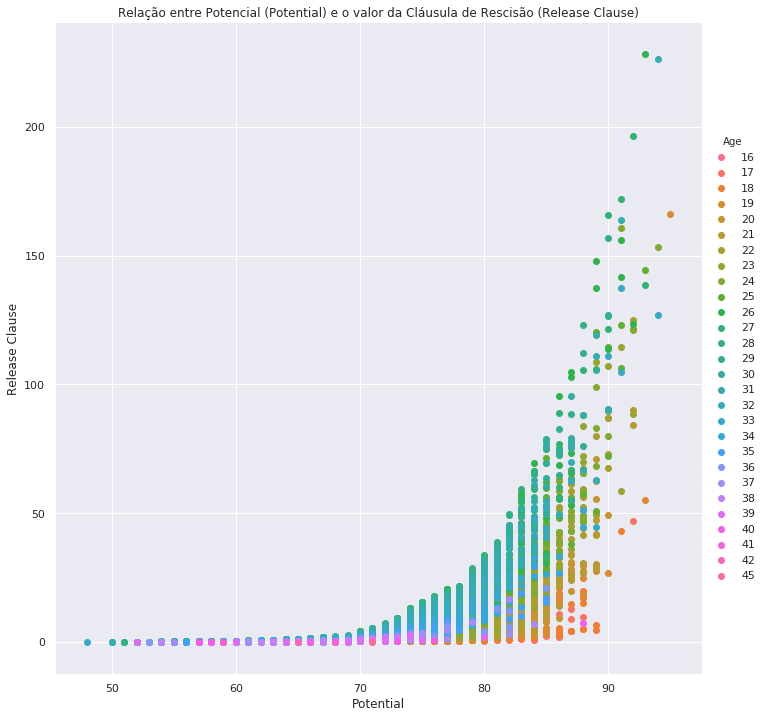

In [96]:
sns.FacetGrid(
    df_fifa_filtrado,
    hue='Age',
    height=10
).map(
    plt.scatter, 'Potential', 'Release Clause'
).add_legend()


plt.title('Relação entre Potencial (Potential) e o valor da Cláusula de Rescisão (Release Clause)')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fac86273e80>,
      dtype=object)

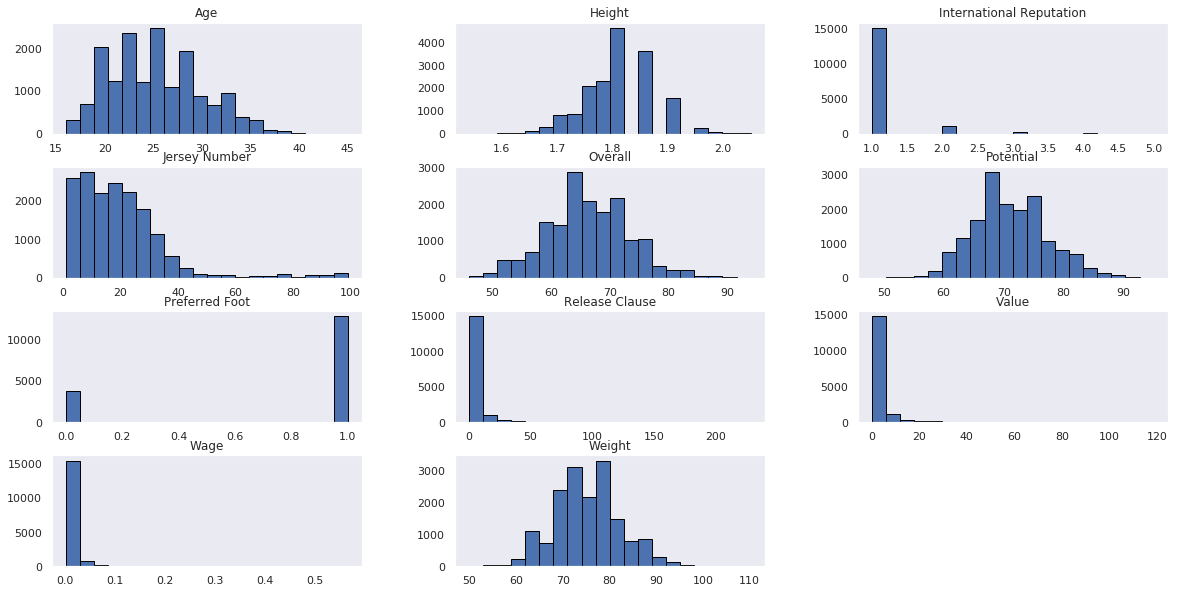

In [97]:
df_fifa_filtrado.hist(edgecolor='black', figsize=(20, 10), grid=False, bins=20)

In [98]:
df_fifa_filtrado['Value'].min()

0.01

In [99]:
df_fifa_filtrado.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Position,Height,Weight,Jersey Number,Release Clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,110.5,0.565,0,5,Atacante,1.70,72.12,10,226.5
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77.0,0.405,1,5,Atacante,1.87,83.01,7,127.1
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118.5,0.290,1,5,Atacante,1.75,68.04,10,228.1
3,De Gea,27,Spain,91,93,Manchester United,72.0,0.260,1,4,Goleiro,1.92,76.20,1,138.6
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102.0,0.355,1,4,Meia,1.80,69.85,7,196.4


In [100]:
s_df = df_fifa_filtrado.groupby('Position').count()['Age']

In [101]:
s_df

Position
Atacante            3019
Centro Avante         66
Goleiro             1900
Lateral Direito     1283
Lateral Esquerdo    1299
Meia                4470
Meia-Atacante        877
Volante              873
Zagueiro            2856
Name: Age, dtype: int64

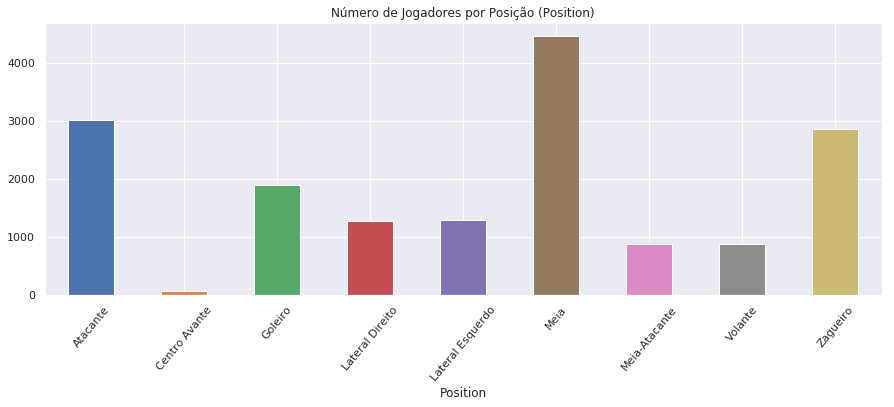

In [102]:
s_df.plot(kind='bar', title='Número de Jogadores por Posição (Position)', figsize=(15,5), rot=50)

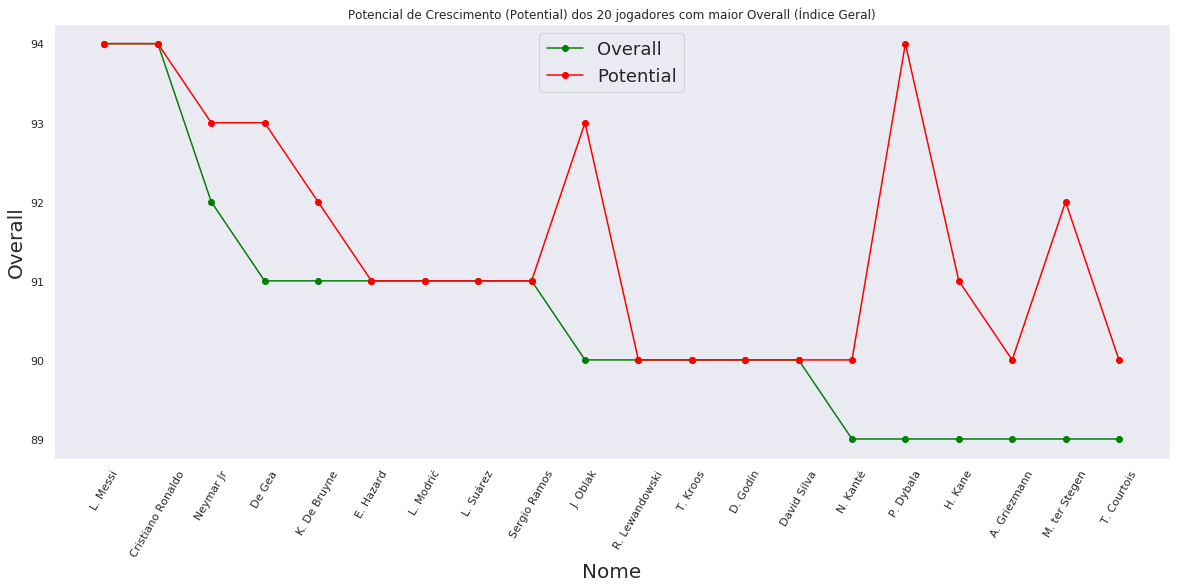

In [103]:
df_fifa_filtrado.set_index('Overall')
df_fifa_filtrado.sort_index()


plt.figure(figsize=(20, 8))
plt.plot(df_fifa_filtrado['Name'][:20], df_fifa_filtrado['Overall'][:20], color='green', linestyle='-', marker='o')
plt.plot(df_fifa_filtrado['Name'][:20], df_fifa_filtrado['Potential'][:20], color='red', linestyle='-', marker='o')

plt.title('Potencial de Crescimento (Potential) dos 20 jogadores com maior Overall (Índice Geral)')
plt.legend(loc='upper center', prop={'size':18})
plt.xlabel('Nome', fontdict={'size':20})
plt.ylabel('Overall', fontdict={'size':20})
plt.xticks(rotation='60')
plt.grid(axis='y')
plt.grid(axis='x')

In [135]:

# Modelo de árvores para feature importance
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(
    n_estimators=50,
    max_depth=5
)

clf.fit(
    df_fifa_filtrado.drop(['Position', 'Name', 'Club', 'Nationality', 'Overall'], axis=1),
    df_fifa_filtrado['Overall']
)

clf.feature_importances_

array([1.32812384e-01, 2.07609025e-01, 3.66984068e-01, 6.26651967e-02,
       6.08830925e-05, 1.43831955e-02, 6.10872163e-04, 1.83351631e-03,
       5.88583527e-03, 2.07155024e-01])

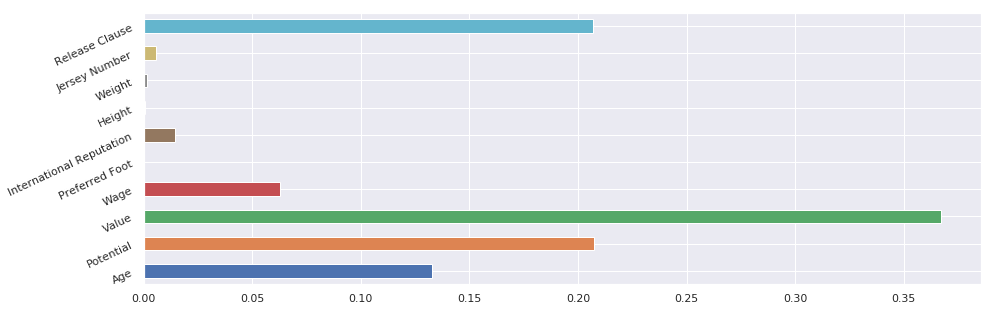

In [136]:
feat_importances = pd.Series(
    clf.feature_importances_, 
    index=df_fifa_filtrado.drop(['Position', 'Name', 'Club', 'Nationality', 'Overall'], axis=1).columns
)

feat_importances.plot(kind='barh',  figsize=(15,5), rot=25);

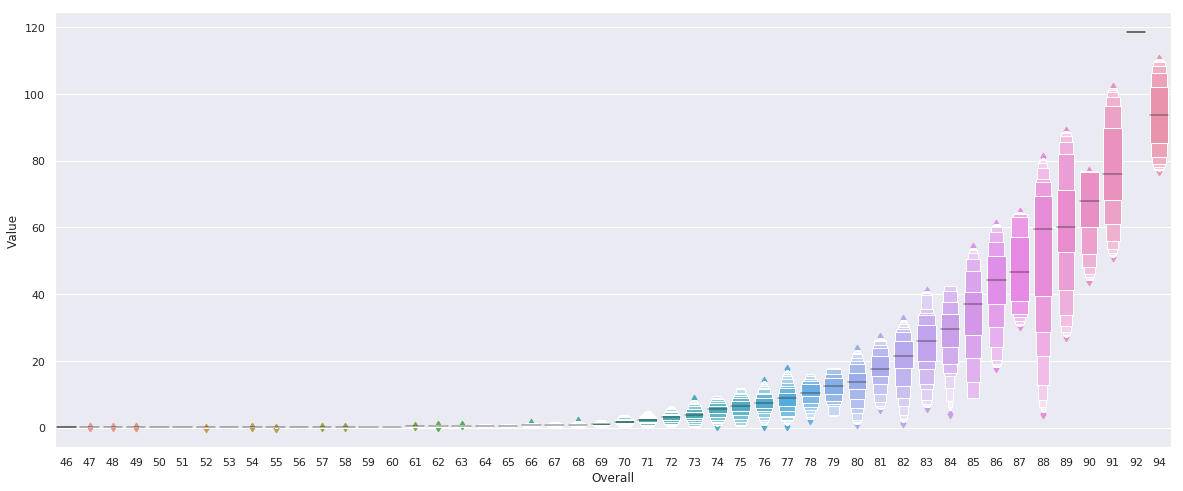

In [106]:
plt.figure(figsize=(20, 8))

sns.set(color_codes=True)

sns.boxenplot(x='Overall', y='Value', data=df_fifa_filtrado, scale="linear")

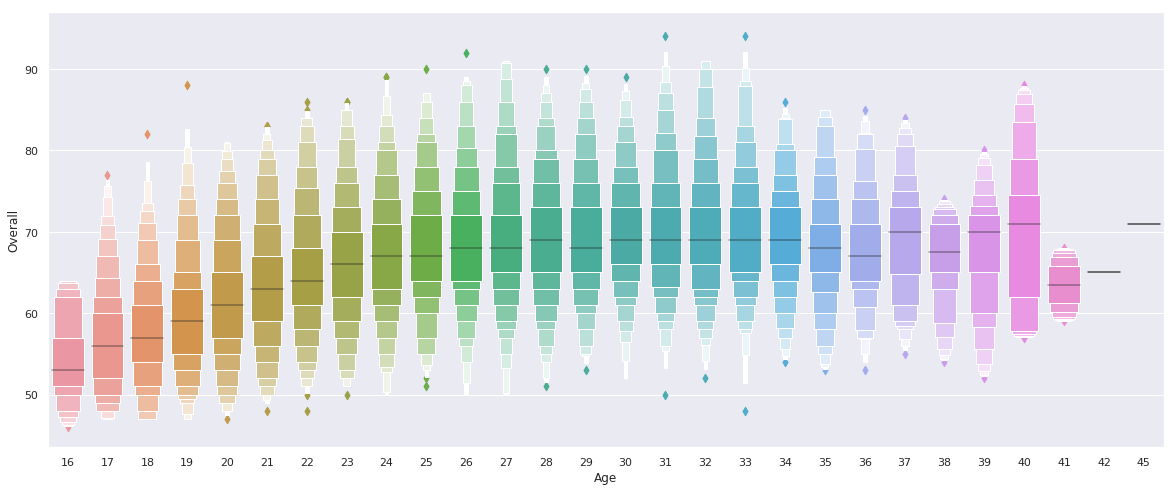

In [107]:
plt.figure(figsize=(20, 8))

sns.set(color_codes=True)

sns.boxenplot(x='Age', y='Overall', data=df_fifa_filtrado, scale="linear")

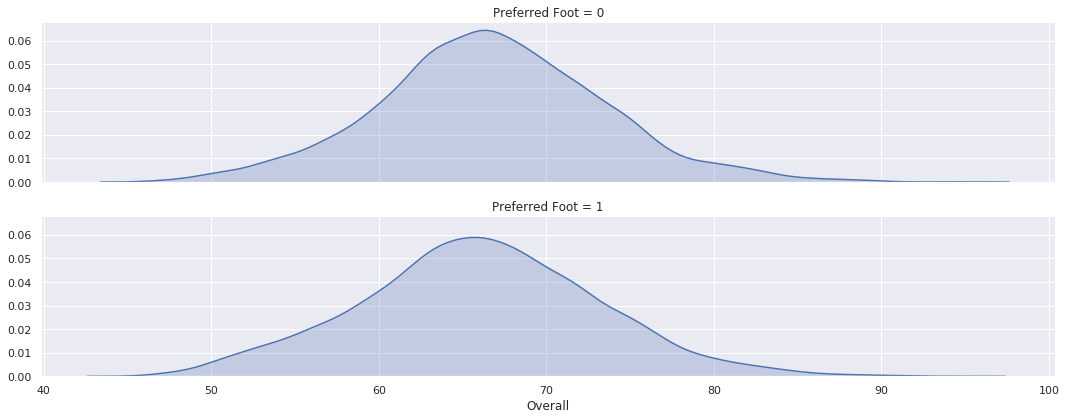

In [108]:
g = sns.FacetGrid(df_fifa_filtrado, row='Preferred Foot', height=3, aspect=5)

g.map(sns.distplot, 'Overall', hist=False, kde_kws={'shade': True})

In [109]:
df_fifa_filtrado['Wage']

0        0.565
1        0.405
2        0.290
3        0.260
4        0.355
5        0.340
6        0.420
7        0.455
8        0.380
9        0.094
10       0.205
11       0.355
12       0.125
13       0.285
14       0.225
15       0.205
16       0.205
17       0.145
18       0.240
19       0.240
20       0.315
21       0.200
22       0.130
23       0.300
24       0.215
25       0.100
26       0.255
27       0.285
29       0.165
30       0.315
         ...  
18176    0.001
18177    0.001
18178    0.001
18179    0.001
18180    0.001
18181    0.001
18182    0.001
18184    0.001
18185    0.001
18186    0.001
18187    0.001
18188    0.001
18189    0.001
18190    0.001
18191    0.001
18192    0.001
18193    0.001
18194    0.001
18195    0.001
18196    0.001
18197    0.001
18198    0.001
18199    0.001
18200    0.001
18201    0.001
18202    0.001
18203    0.001
18204    0.001
18205    0.001
18206    0.001
Name: Wage, Length: 16643, dtype: float64

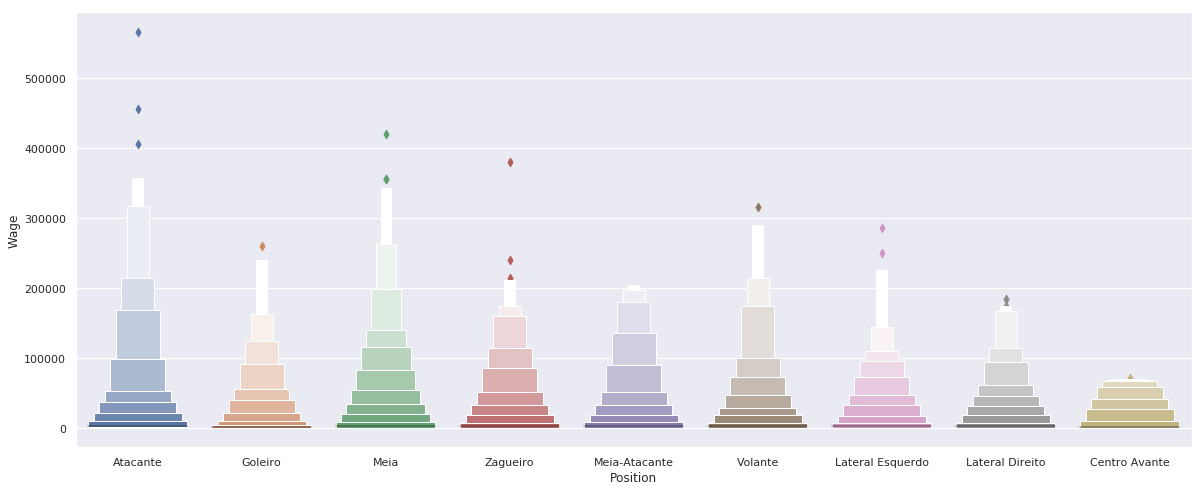

In [110]:
df_wage_mil_euros = df_fifa_filtrado[['Wage', 'Position']]
df_wage_mil_euros['Wage'] = df_wage_mil_euros['Wage'].apply(lambda x: x * 1000000)

plt.figure(figsize=(20,8))
sns.boxenplot(x='Position', y='Wage', data=df_wage_mil_euros , scale="linear")

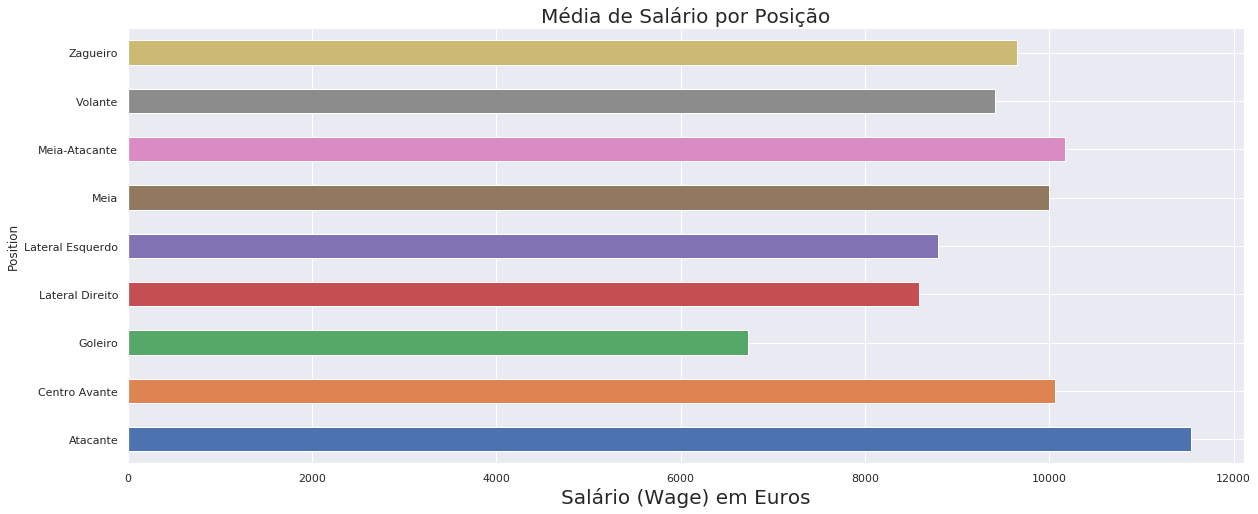

In [111]:
plt.figure(figsize=(20,8))
plt.title("Média de Salário por Posição",  fontdict={'size':20})
plt.xlabel('Salário (Wage) em Euros', fontdict={'size':20})

df_wage_mil_euros.groupby('Position')['Wage'].mean().plot(kind='barh')

In [112]:
df_fifa_filtrado

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Position,Height,Weight,Jersey Number,Release Clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,110.50,0.565,0,5,Atacante,1.70,72.12,10,226.500
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77.00,0.405,1,5,Atacante,1.87,83.01,7,127.100
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118.50,0.290,1,5,Atacante,1.75,68.04,10,228.100
3,De Gea,27,Spain,91,93,Manchester United,72.00,0.260,1,4,Goleiro,1.92,76.20,1,138.600
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102.00,0.355,1,4,Meia,1.80,69.85,7,196.400
5,E. Hazard,27,Belgium,91,91,Chelsea,93.00,0.340,1,4,Atacante,1.72,73.94,10,172.100
6,L. Modrić,32,Croatia,91,91,Real Madrid,67.00,0.420,1,4,Meia,1.72,66.23,10,137.400
7,L. Suárez,31,Uruguay,91,91,FC Barcelona,80.00,0.455,1,5,Atacante,1.82,86.18,9,164.000
8,Sergio Ramos,32,Spain,91,91,Real Madrid,51.00,0.380,1,4,Zagueiro,1.82,82.10,15,104.600
9,J. Oblak,25,Slovenia,90,93,Atlético Madrid,68.00,0.094,1,3,Goleiro,1.87,87.09,1,144.500


In [113]:
df_media_salario_club = pd.DataFrame(df_fifa_filtrado.groupby('Club')['Wage'].mean())


In [114]:
df_media_salario_club = df_media_salario_club.sort_values(by='Wage', ascending=False)

In [115]:
df_media_salario_club['Wage'] = df_media_salario_club['Wage'].apply(lambda x : x * 1000000)

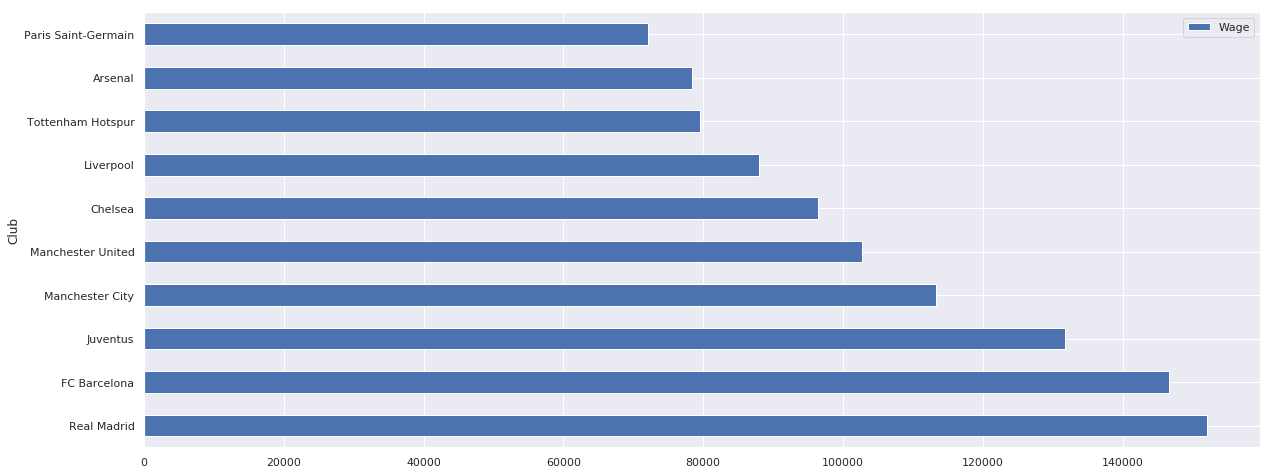

In [116]:
df_media_salario_club[:10].plot(kind='barh', figsize=(20, 8))

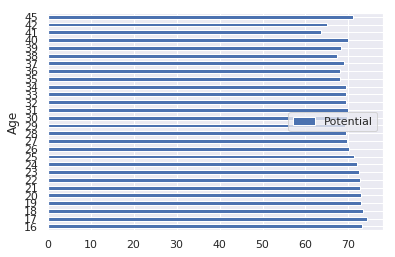

In [119]:
df_age = pd.DataFrame(df_fifa_filtrado.groupby('Age')['Potential'].mean())

df_age.plot(kind='barh')

In [130]:
df_age['Age'] = df_age.index

In [131]:
df_age

,Potential,Age
Age,,
16,73.219512,16
17,74.218310,17
18,73.326676,18
19,72.885529,19
20,72.890009,20
21,72.633607,21
22,72.576956,22
23,72.375105,23
24,71.895522,24


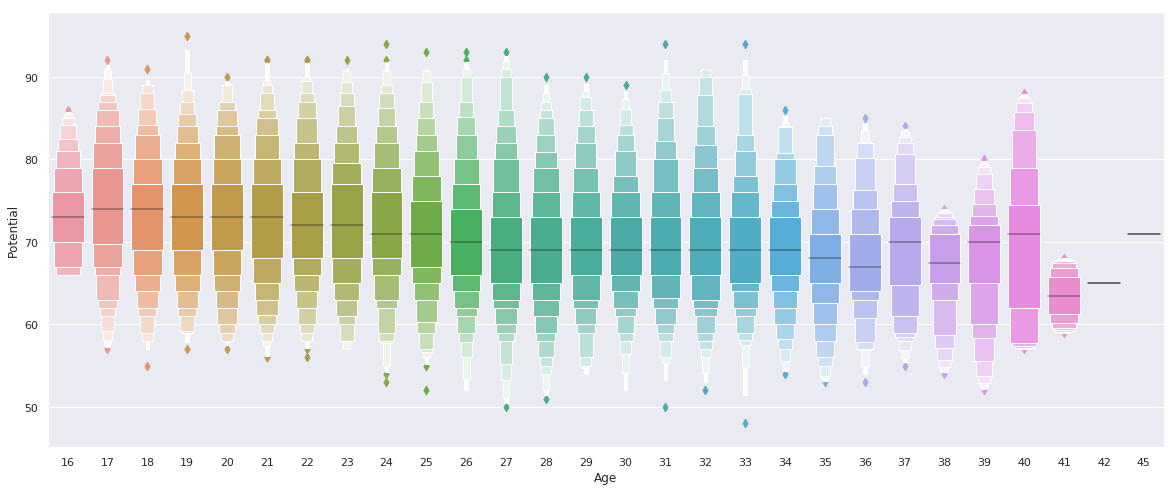

In [133]:
plt.figure(figsize=(20,8))
sns.boxenplot(x='Age', y='Potential', data=df_fifa_filtrado , scale="linear")